# Big Boxes Near Corners

In [6]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt

svc = None
X_train_scaler = None

with open('svm.p', 'rb') as f:
    data = pickle.load(f)
    svc = data['svm']
    X_train_scaler = data['scaler']
    orient = data['orient'] 
    pix_per_cell = data['pix_per_cell']
    cell_per_block = data['cell_per_block']
    spatial_feat = data['spatial_feat']
    hist_feat = data['hist_feat']
    hog_feat = data['hog_feat']
    laplacian_feat = data['laplacian_feat']
    color_space = data['color_space']

color_space_code = eval('cv2.COLOR_RGB2' + color_space)

def get_box_features(box_img_lab):
    if box_img_lab.shape[0] != 64 or box_img_lab.shape[1] != 64:
        raise Exception("Image has to be 64 x 64")
        
    features = extract_feature_image(box_img_lab, orient=orient, pix_per_cell=pix_per_cell,
                               cell_per_block=cell_per_block, hog_channel=0,
                               spatial_feat = spatial_feat,
                               hist_feat = hist_feat,
                               hog_feat = hog_feat, 
                               laplacian_feat = laplacian_feat)
    
    # normalize features of the box using the same parameters as were used while training
    return X_train_scaler.transform([np.ravel(features)])

print('SVM loaded: svc')
print('Scaler loaded: X_train_scaler')
print('Color Space:', color_space)

SVM loaded: svc
Scaler loaded: X_train_scaler
Color Space: LAB


In [7]:
import matplotlib.pyplot as plt
from lesson_functions import *

%reload_ext autoreload
%autoreload 2

def get_box_pixels(img, box):
    box_img = img[box[0][1]:box[1][1], box[0][0]:box[1][0]]
    box_img_64 = cv2.resize(box_img, (64,64))    
    return box_img_64

def has_car(img_lab, box):
    box_img_64 = get_box_pixels(img_lab, box)
    features = get_box_features(box_img_64)
    return svc.predict(features)

In [68]:
#forget about left for the time being
# boxes.extend(get_boxes(img, x_start_stop=[0, 400], y_start_stop=[10, 250], 
#                      box=(340, 250), offset_factor=(0.2,1), no_of_boxes = 2))

def big_box(img, draw_color = None, no_of_boxes = None, offset = (-0.2, 0)):
    #x_start = img.shape[1] - 600
    #x_stop = img.shape[1] - 120
    x_start = 80
    x_stop = img.shape[1] - x_start
    y_start = 440
    y_stop = img.shape[0]
    box = (250,200)
    
    return get_boxes(img, 
          x_start_stop = (x_start, x_stop), 
          y_start_stop = (y_start, y_stop),
          box=box, 
          draw_color = draw_color, 
          no_of_boxes = no_of_boxes, 
          offset_factor=offset)


def medium_box(img, draw_color = None, no_of_boxes = None, offset = (-0.4, 0)):
    #x_start = 660
    x_start = 0
    x_stop = img.shape[1]
    y_start = 400
    y_stop = 600
    box=(175,160)

    return get_boxes(img, 
          x_start_stop = (x_start, x_stop), 
          y_start_stop = (y_start, y_stop),
          box=box, 
          draw_color = draw_color, 
          no_of_boxes = no_of_boxes,
          offset_factor = offset)
    
def small_box(img, draw_color = None, no_of_boxes = None, offset = (-0.3, 0.5)):
    #x_start = 600
    x_start = 0
    x_stop = img.shape[1]
    y_start = 390
    y_stop = 550
    box=(160,120)

    return get_boxes(img, 
          x_start_stop = (x_start, x_stop), 
          y_start_stop = (y_start, y_stop),
          box=box, 
          draw_color=draw_color, 
          no_of_boxes = no_of_boxes,
          offset_factor = offset)


def smallest_box(img, draw_color = None, no_of_boxes = None, offset = (-0.2, 0.2)):
    #x_start = 600
    x_start = 100
    x_stop = img.shape[1] - 100
    y_start = 400
    y_stop = 480
    box=(80,70)

    return get_boxes(img, 
          x_start_stop = (x_start, x_stop), 
          y_start_stop = (y_start, y_stop),
          box=box, 
          draw_color = draw_color, 
          no_of_boxes = no_of_boxes,
          offset_factor=offset)
    
def get_all_boxes(img):
    boxes = []
    boxes.extend(big_box(img))
    boxes.extend(medium_box(img))
    boxes.extend(small_box(img))
    boxes.extend(smallest_box(img))
    return boxes


## Check Sizes

Testing on 1 files


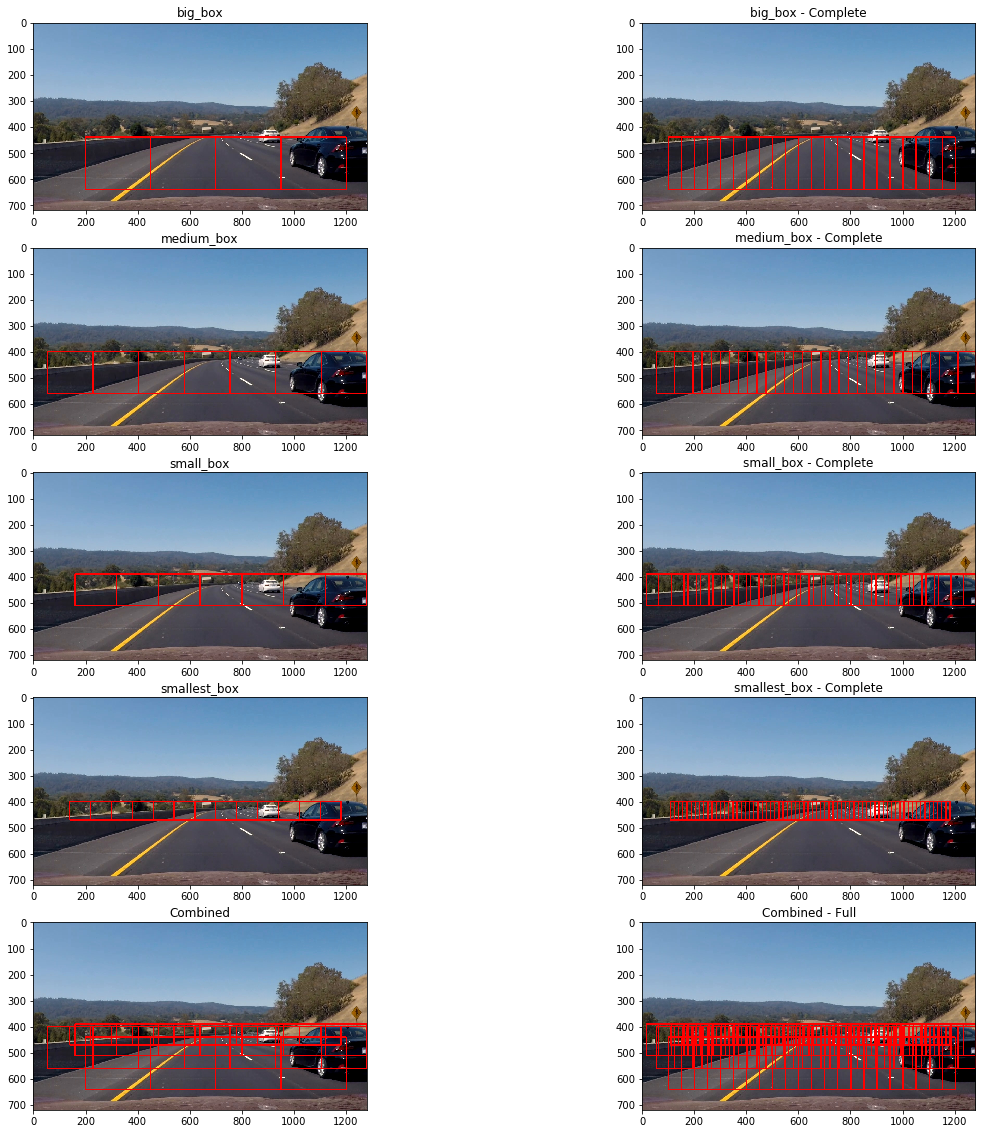

In [66]:
def draw_box_ax(img, boxes, ax, title):
    img = np.copy(img)
    for box in boxes:
        cv2.rectangle(img, box[0], box[1], (255,0,0), 4)
    ax.set_title(title)
    ax.imshow(img)

def show_box_sizes(filename, loaders):
    test_image = load_image(filename, 'RGB')
    
    f, ax = plt.subplots(len(loaders) + 1, 2, figsize=(20,20))
    
    single_boxes = []
    full_boxes = []
    
    for i, loader in enumerate(loaders):
        boxes = loader(test_image, offset = (-1,0))
        single_boxes.extend(boxes)
        draw_box_ax(test_image, boxes, ax[i,0], str(loader).split(' ')[1])

        boxes = loader(test_image)
        full_boxes.extend(boxes)
        draw_box_ax(test_image, boxes, ax[i,1], str(loader).split(' ')[1] + ' - Complete')

    draw_box_ax(test_image, single_boxes, ax[len(loaders), 0], 'Combined')
    draw_box_ax(test_image, full_boxes, ax[len(loaders), 1], 'Combined - Full')
    
        
#test_images = glob.glob('./test_images/*.jpg')
test_images = ['./test_images/0729.jpg']
print('Testing on {} files'.format(len(test_images)))

for filename in test_images:
    show_box_sizes(filename, [big_box, medium_box, small_box, smallest_box])

plt.show()
plt.close('all')

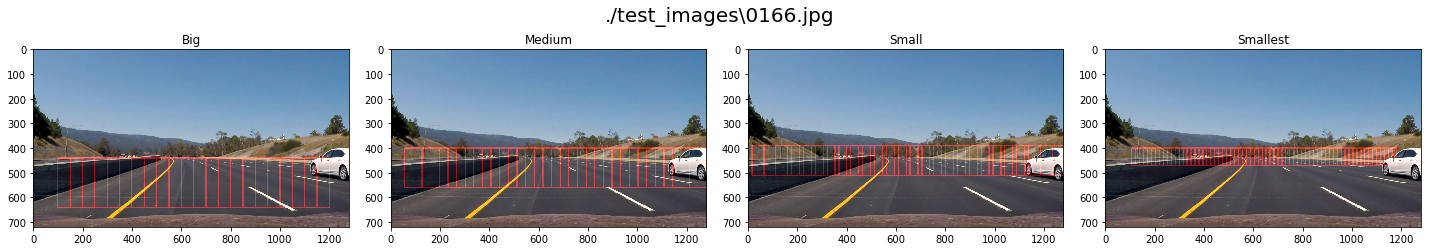

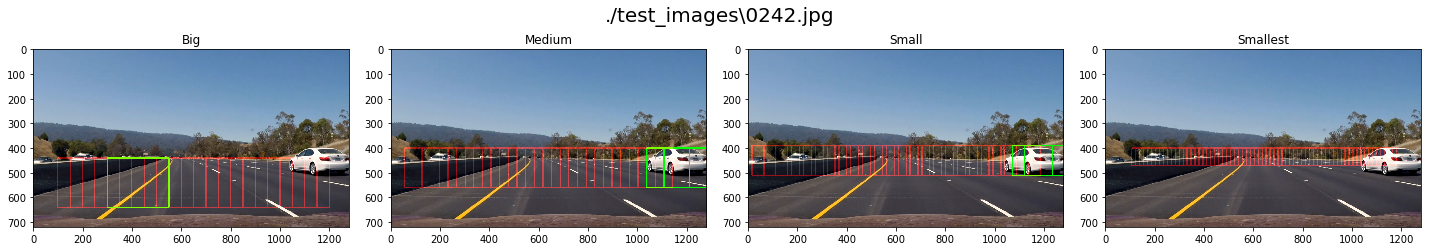

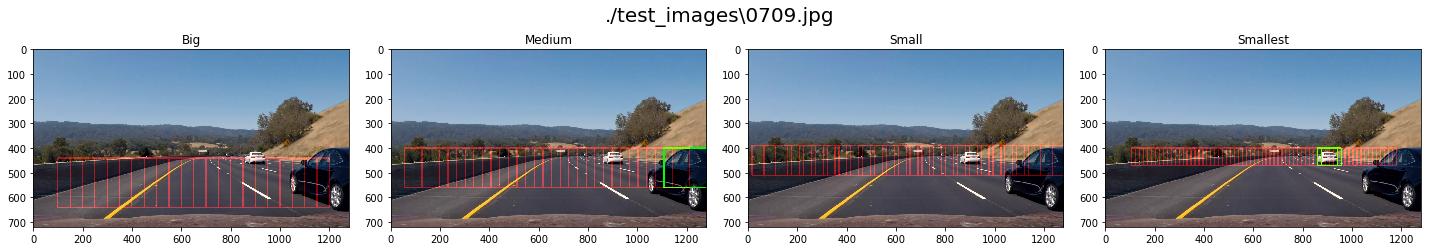

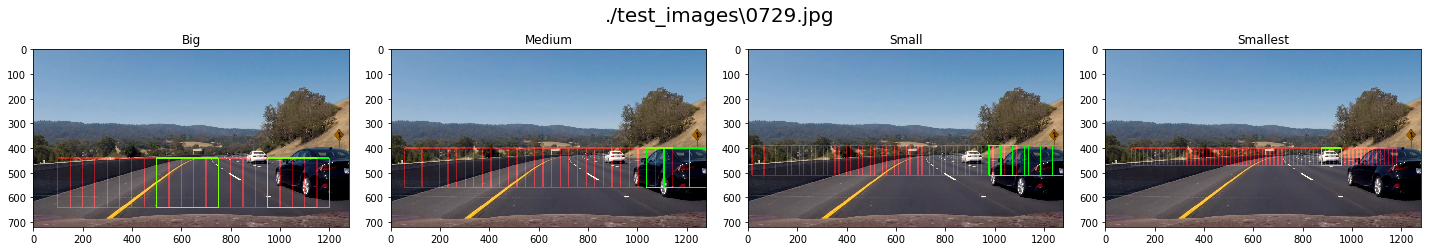

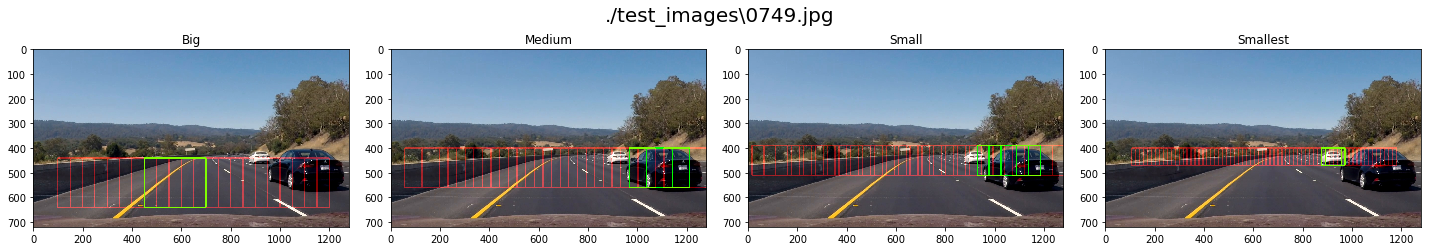

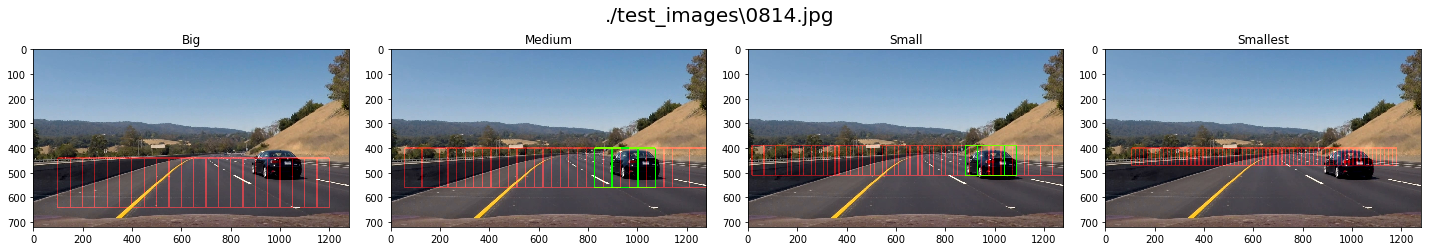

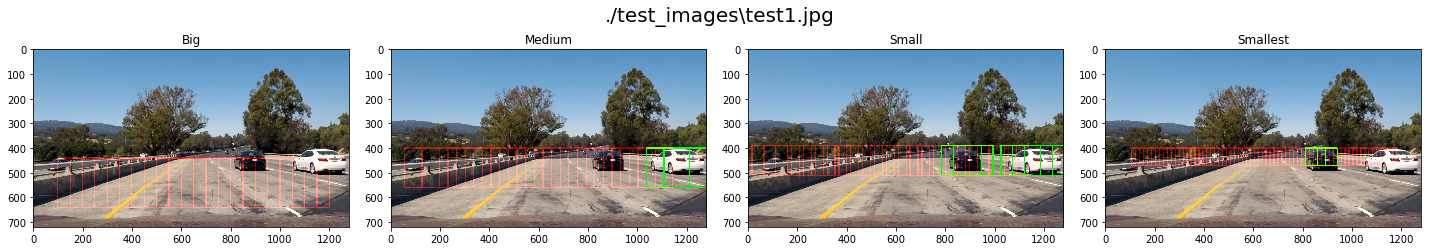

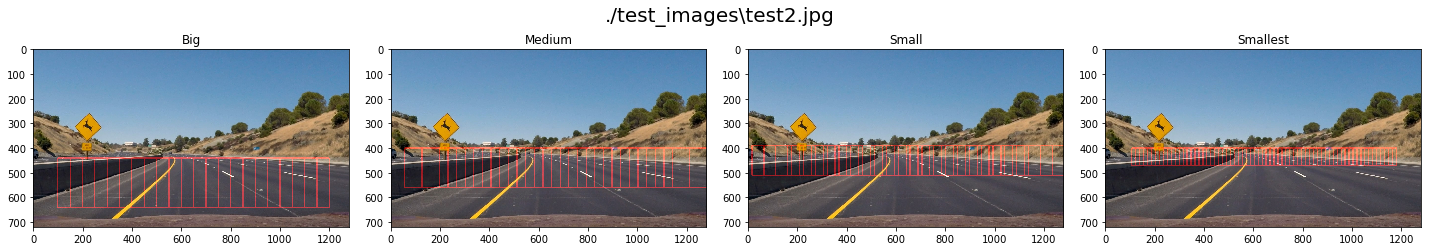

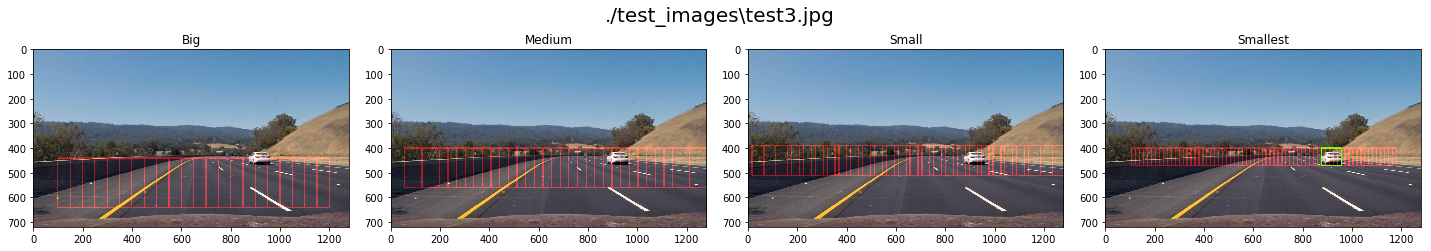

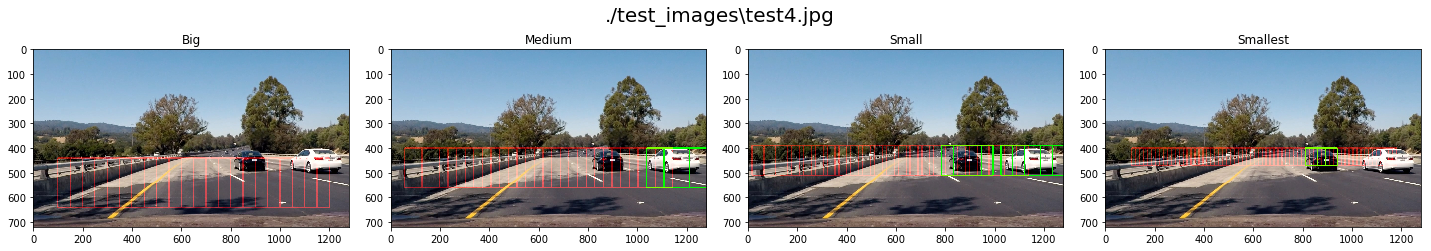

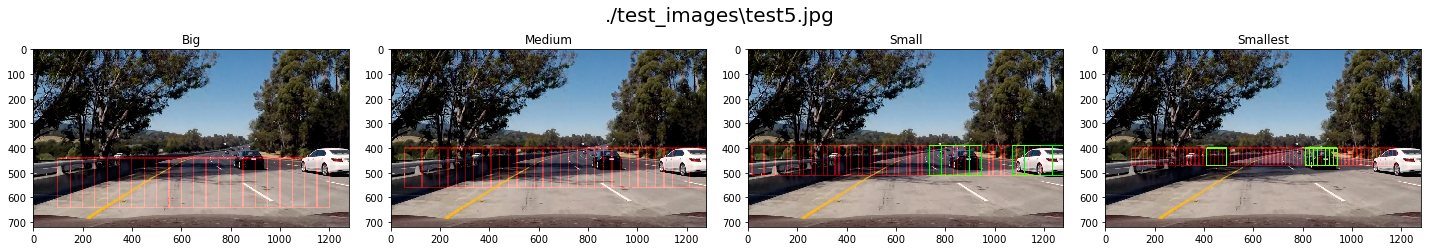

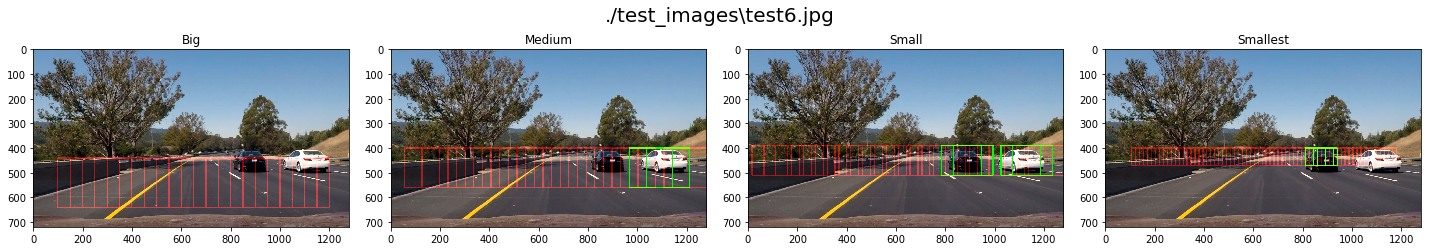

In [72]:
def show_different_boxes(filename):
    img = load_image(filename, 'RGB')
    
    f, ax = plt.subplots(1, 4, figsize=(20,4))
    f.suptitle(filename, fontsize=20)
    f.tight_layout()

    show_boxes_with_car(img, big_box(img), 'Big', ax[0])
    show_boxes_with_car(img, medium_box(img), 'Medium', ax[1])
    show_boxes_with_car(img, small_box(img), 'Small', ax[2])
    show_boxes_with_car(img, smallest_box(img), 'Smallest', ax[3])

    plt.show()

def show_boxes_with_car(img, boxes, title, ax):
    img_lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    canvas = np.copy(img)
    canvas2 = np.zeros_like(img)
    
    for box in boxes:
        if has_car(img_lab, box):
            cv2.rectangle(canvas, box[0], box[1], (0,255,0), 4)
        else:
            cv2.rectangle(canvas2, box[0], box[1], (255,0,0), 4)

    canvas = cv2.addWeighted(canvas, 1, canvas2, 0.5, 0)
    ax.imshow(canvas)
    ax.set_title(title)
    

#test_images = ['./test_images/0242.jpg']
test_images = glob.glob('./test_images/*.jpg')
#print('Testing on {} files'.format(len(test_images)))

for filename in test_images:
    show_different_boxes(filename)

plt.show()
plt.close('all')

./problem/0749-10.jpg


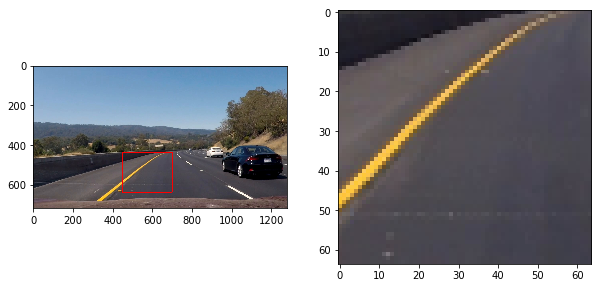

In [85]:
import os

def show_specific_box(img, box):
    img_copy = np.copy(img)
    
    cv2.rectangle(img_copy, box[0], box[1], (255,0,0), 4)
    box_img = get_box_pixels(img, box)
    f, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
    ax1.imshow(img_copy)
    ax2.imshow(box_img)

test_images = glob.glob('./test_images/0749.jpg')

for filename in test_images:
    img = load_image(filename, 'RGB')
    img_lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    
    boxes = big_box(img)
    
    for box_no, box in enumerate(boxes):
        if has_car(img_lab, box):
            show_specific_box(img, box)
            
            box_img = get_box_pixels(img, box)
            problem = cv2.cvtColor(box_img, cv2.COLOR_RGB2BGR)
            
            basename = os.path.basename(filename)
            output = './problem/{}-{}.jpg'.format(os.path.splitext(basename)[0], box_no)
            print(output)
            cv2.imwrite(output, proble)

plt.show()
plt.close('all')

# Heatmap Test

Testing on 12 files


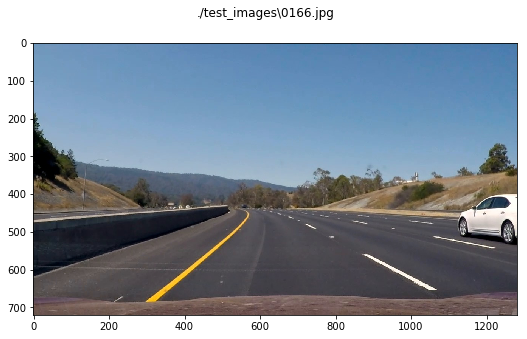

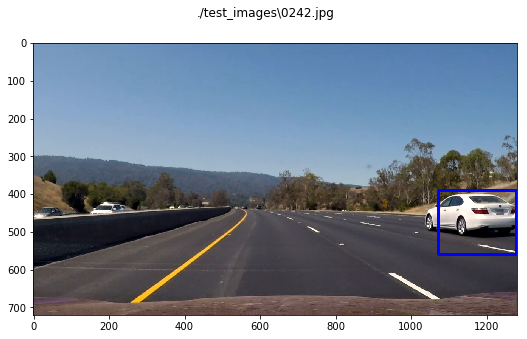

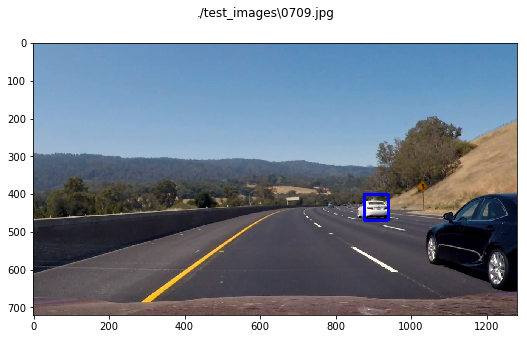

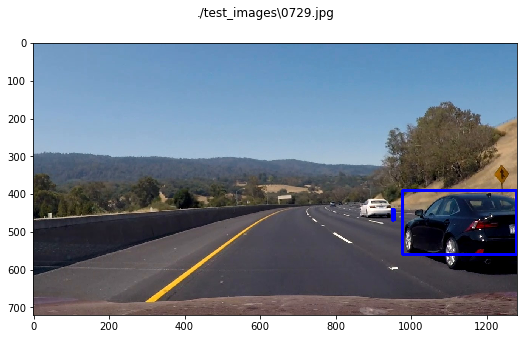

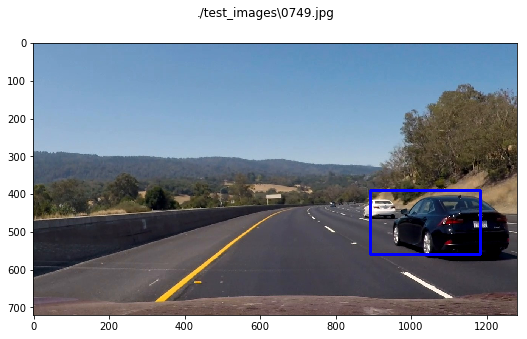

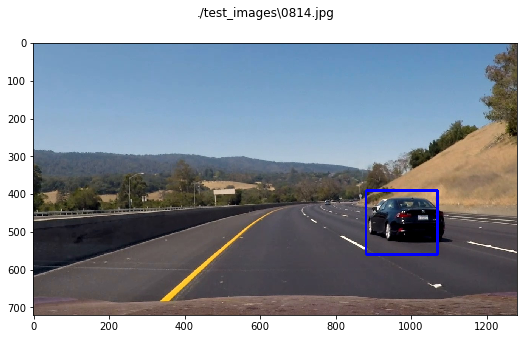

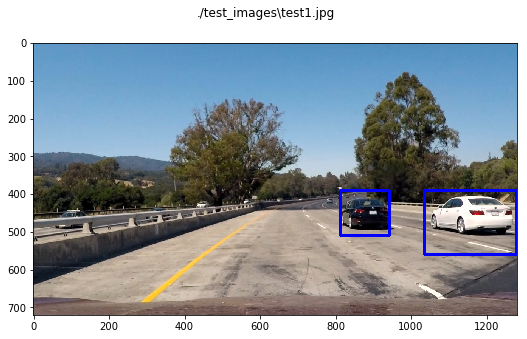

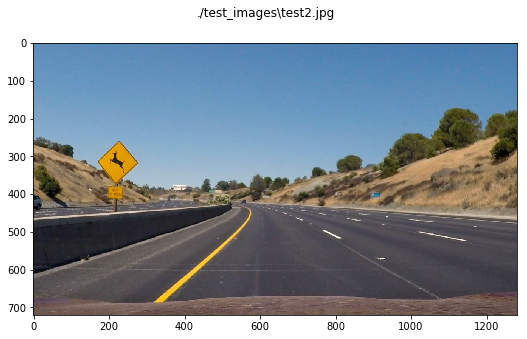

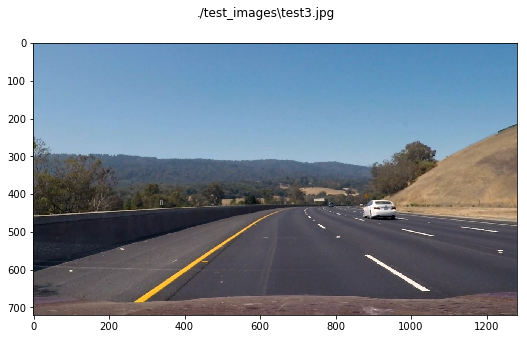

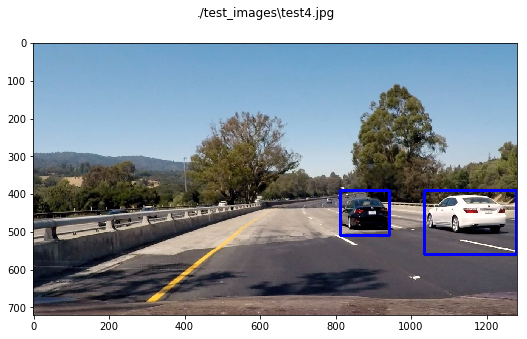

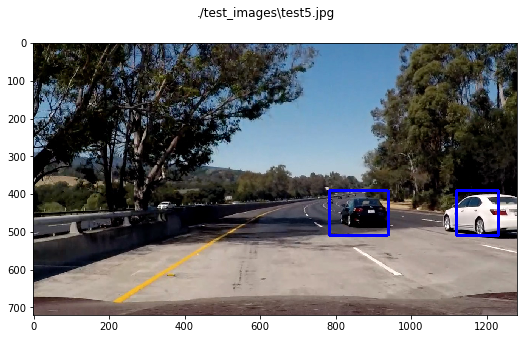

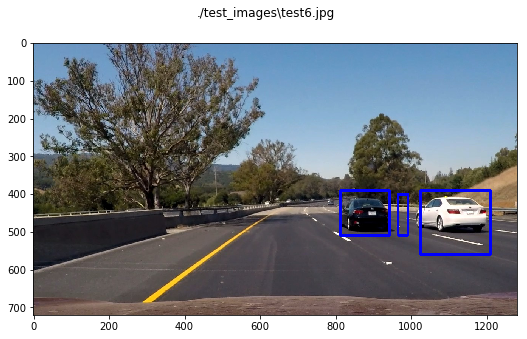

In [73]:
import glob
from scipy.ndimage.measurements import label

def detect_cars(img):
    img_lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    
    boxes = get_all_boxes(img_lab)
    car_boxes = []
    
    for box in boxes:
        if has_car(img_lab, box):
            car_boxes.append(box)
    return car_boxes

def heatmap_threshold(heatmap, threshold):
    heatmap[heatmap < threshold] =  0
    
def add_heat(heatmap, boxes):
    for box in boxes:
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1
        
def show_heatmap(heatmap):
    heatmap_red = np.dstack(((heatmap * 255/10), np.zeros_like(heatmap), np.zeros_like(heatmap)))
    plt.imshow(heatmap_red)
    
def draw_labeled_bboxes(img, heatpmap):
    labels = label(heatmap)

    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img


test_images = glob.glob('./test_images/*.jpg')
print('Testing on {} files'.format(len(test_images)))

for filename in test_images:
    #filename = './test_images/test1.jpg'
    img = load_image(filename, 'RGB')

    heatmap = np.zeros(img.shape[:2], np.float32)
    
    boxes = detect_cars(img)
    add_heat(heatmap, boxes)
    heatmap_threshold(heatmap, 2)
    draw_labeled_bboxes(img, heatmap)

    f, ax = plt.subplots(1,1, figsize=(10,5))
    f.suptitle(filename)
    ax.imshow(img)
    
plt.show()
plt.close('all')


In [74]:
from collections import deque

min_frames = 3
heatmaps = deque(maxlen = min_frames)

#filename = './test_images/test1.jpg'
#for frame_no in range(0, 1260):
for frame_no in range(169, 300):
    filename = './project_video-frames/{:04d}.jpg'.format(frame_no)
    # read RGB since thats what video will give us and then our function
    # internally converts it to LAB
    img = load_image(filename, 'RGB')

    heatmap = np.zeros(img.shape[:2], np.float32)
    
    boxes = detect_cars(img)
    add_heat(heatmap, boxes)
    #heatmap_threshold(heatmap, 2)
    #draw_labeled_bboxes(img, heatmap)
    
    heatmaps.append(heatmap)
    
    if len(heatmaps) >= min_frames:
#         print('enough heatmaps are here...coool')
        
        summed_up = heatmaps[0]
        for i in range(1, len(heatmaps)):
            summed_up += heatmaps[i]
        
        heatmap_threshold(summed_up, 2)
        draw_labeled_bboxes(img, summed_up)

    output_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    cv2.imwrite('./output/{:04d}.jpg'.format(frame_no), output_img)
    
#     f, ax = plt.subplots(1,1, figsize=(10,5))
#     f.suptitle(filename)
#     ax.imshow(img)
    print(frame_no, end='\r')
    
plt.show()
plt.close('all')
print('Done')


Done
